In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

generate toy datasets 

In [250]:
X,y=make_blobs(n_samples=2000,n_features=2,centers=2,random_state=42,cluster_std=3)

n_features=2
print(X.shape)
print(y.shape)

(2000, 2)
(2000,)


visualise the dataset

In [251]:
def visualise(X,y):
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

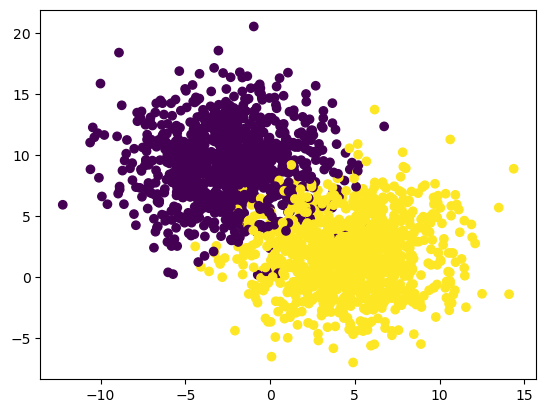

In [252]:
visualise(X,y)

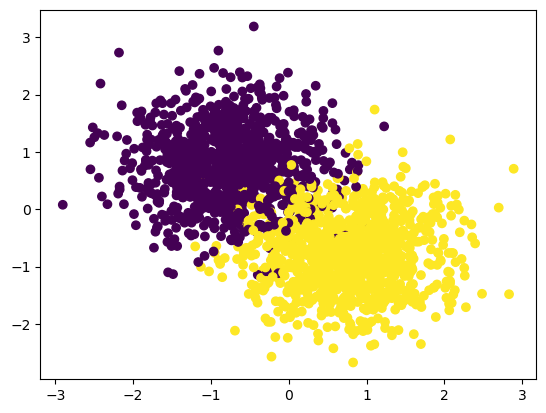

In [253]:
def normalise(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)

    return (X-u)/std


X=normalise(X)
visualise(X,y)



train test split

In [254]:
XT,Xt,yT,yt=train_test_split(X,y,test_size=0.25,shuffle=False,random_state=0)

In [255]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


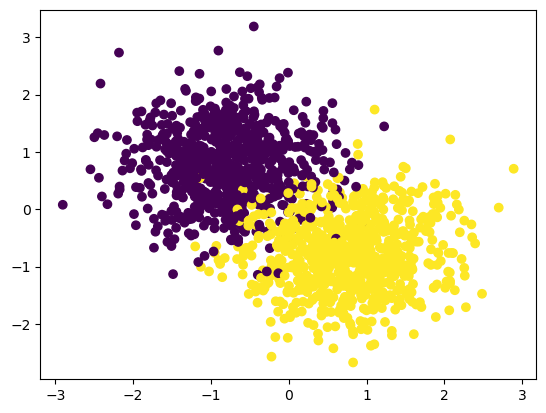

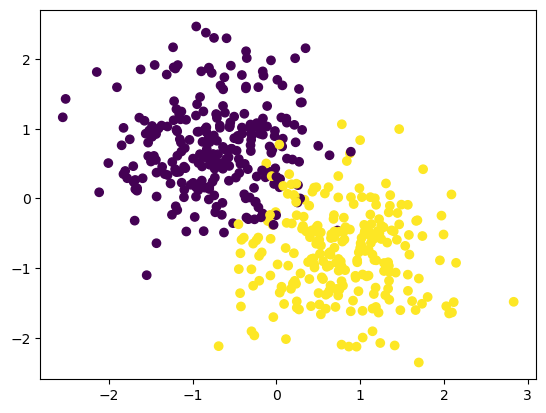

In [256]:
visualise(XT,yT)
visualise(Xt,yt)

hypothesis function and sigmoid function

In [257]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))


binary cross entropy loss function

In [258]:
def error(y,yp):
    
    loss=-np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))
    return loss


gradient function

In [259]:
def gradient(X,y,yp):
    m=X.shape[0]

    gradient=-1/m*np.dot(X.T,(y-yp))
    return gradient

In [260]:
def train(X,y,learn_rate=0.2,max_itrs=300):
    # randomly analysed theta
    error_list=[]
    theta=np.random.randn(n_features+1,1)

    for i in range(max_itrs):
        yp=hypothesis(X,theta)
        e=error(y,yp)
        error_list.append(e)
        grad=gradient(X,y,yp)
        theta=theta-learn_rate*grad

    plt.plot(error_list)

    return theta



In [261]:
def addExtracolumn(X):
    if X.shape[1]==n_features:
        ones=np.ones((X.shape[0],1))
        X=np.hstack((ones,X))

    return X




In [262]:
XT=addExtracolumn(XT)
XT

array([[ 1.        , -1.43211741,  0.65078613],
       [ 1.        , -0.47100516,  0.87372191],
       [ 1.        , -0.40182883,  2.1275269 ],
       ...,
       [ 1.        ,  0.02390726,  0.74454457],
       [ 1.        , -0.35936993,  0.18771848],
       [ 1.        ,  1.09360417, -1.10077065]])

In [263]:
Xt=addExtracolumn(Xt)

In [264]:
XT.shape

(1500, 3)

In [265]:
yT.shape

(1500,)

In [266]:
yT=yT.reshape(-1,1)
yt=yt.reshape(-1,1)

In [267]:
yT.shape

(1500, 1)

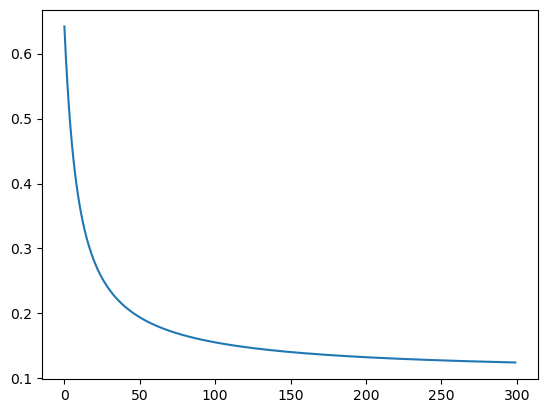

In [268]:
theta=train(XT,yT)

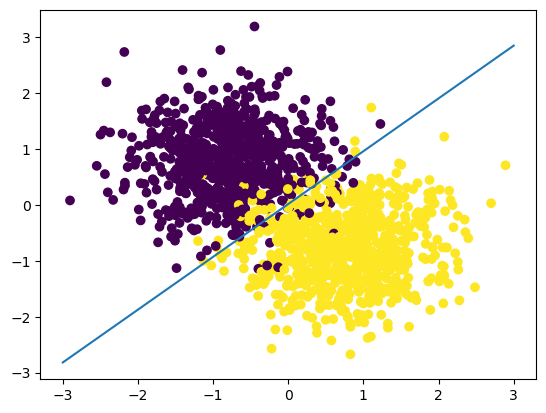

In [269]:
plt.scatter(XT[:,1],XT[:,2],c=yT)

x1=np.linspace(-3,3,6)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

prediction

In [270]:
def predict(X,theta):
    h=hypothesis(X,theta)
    preds=np.zeros((X.shape[0],1),dtype='int')
    preds[h>=0.5]=1

    return preds

accuracy


In [271]:
def accuracy(X,y,theta):
    preds=predict(X,theta)
    return ((y==preds).sum())/y.shape[0]*100

train accuracy

In [272]:
accuracy(XT,yT,theta)

95.86666666666666

test accuracy

In [273]:
accuracy(Xt,yt,theta)

96.39999999999999

logistic regression using sklearn

In [274]:
from sklearn.linear_model import LogisticRegression

In [275]:
model=LogisticRegression()
X,y=make_blobs(n_samples=2000,n_features=2,centers=2,random_state=42,cluster_std=3)

In [276]:
model.fit(X,y)

LogisticRegression()

In [277]:
model.predict(X)

array([0, 0, 0, ..., 1, 0, 1])

In [278]:
model.score(X,y)

0.96

Multiclass logistic regression

In [279]:
X,y=make_blobs(n_samples=2000,n_features=4,cluster_std=3,centers=3,random_state=42)

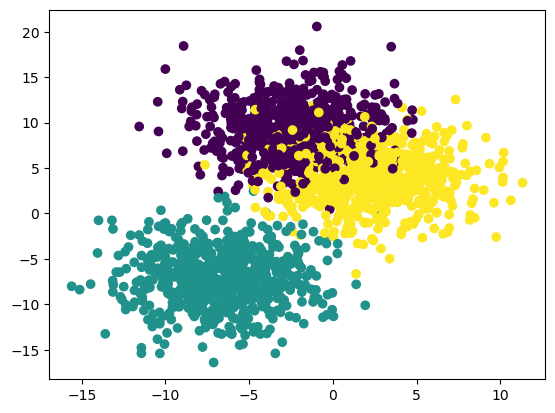

In [280]:
plt.scatter(X[:,0],X[:,1],c=y)

plt.show()

In [281]:
model=LogisticRegression()


In [282]:
model.fit(X,y)

LogisticRegression()

In [283]:
model.predict(X)

array([2, 0, 1, ..., 1, 1, 1])

In [284]:
model.score(X,y)

0.9945